In [3]:
%load_ext autoreload
%autoreload 2

## Data retrieval and cleaning

In [4]:
from ift6758.data.acquisition import NHLGameData
from ift6758.data.cleaning import DataCleaner

data_path_raw = './../../ift6758/data/json_raw/'
nhl_games_data = NHLGameData(data_path_raw)
for year in range(2016,2021):
    nhl_games_data.fetch_season(year)
    
data_path_clean = './../../ift6758/data/json_clean/'
data_cleaner = DataCleaner(data_raw=nhl_games_data, data_path_clean=data_path_clean)
for year in range(2016,2021):
    data_cleaner.clean_season(year)

Loading from cache file ./../../ift6758/data/json_raw/2016\2016-regular.pkl
Found 1230 regular games for season 2016-2017
Loading from cache file ./../../ift6758/data/json_raw/2016\2016-playoff.pkl
Found 102 playoff games for season 2016-2017
Loading from cache file ./../../ift6758/data/json_raw/2017\2017-regular.pkl
Found 1271 regular games for season 2017-2018
Loading from cache file ./../../ift6758/data/json_raw/2017\2017-playoff.pkl
Found 105 playoff games for season 2017-2018
Loading from cache file ./../../ift6758/data/json_raw/2018\2018-regular.pkl
Found 1271 regular games for season 2018-2019
Loading from cache file ./../../ift6758/data/json_raw/2018\2018-playoff.pkl
Found 105 playoff games for season 2018-2019
Loading from cache file ./../../ift6758/data/json_raw/2019\2019-regular.pkl
Found 1271 regular games for season 2019-2020
Loading from cache file ./../../ift6758/data/json_raw/2019\2019-playoff.pkl
Found 105 playoff games for season 2019-2020
Loading from cache file ./..

## Feature engineering

In [5]:
from ift6758.features import FeatureEng
data_path_clean = './../../ift6758/data/json_clean/'
df_eng = FeatureEng(data_path_clean)

In [6]:
df = df_eng.features_1(2016,2020)
df

,empty_net,is_goal,distance_goal,angle_shot
0,0,0,13.93,21.034961
1,0,0,13.60,72.917417
2,0,0,77.03,-29.558654
3,0,0,58.94,-14.743729
4,0,0,62.61,26.565007
...,...,...,...,...
298075,0,0,26.42,-60.522920
298076,0,0,40.50,69.763292
298077,0,0,14.87,42.259920
298078,0,0,11.40,-37.881841


In [9]:
ano = df_eng.anomalies
ano.sample(10)

,game_id,period,period_time,empty_net,is_goal,distance_goal,angle_shot
136387,2017020985,1,06:51,0,1,111.16,3.094115
179020,2018020401,2,06:46,0,1,167.00,-0.343091
167649,2018020218,3,10:11,0,1,104.24,8.829344
249709,2019020288,3,17:02,0,1,163.20,2.809743
182033,2018020452,2,05:10,0,1,170.00,0.000000
33979,2016020559,3,18:14,0,1,177.01,0.647387
198274,2018020722,1,04:39,0,1,176.38,-7.165204
212448,2018020953,1,12:06,0,1,151.33,7.594515
259716,2019020453,2,06:28,0,1,167.00,-0.343091
139498,2017021034,1,07:07,0,1,129.25,10.701168


In [5]:
df_eng.getTestSet(2020)

,game_id,period,period_time,type,team,x,y,shooter,goalie,shot_type,empty_net,strength,opposite_team_side
0,2020020001,1,00:16,SHOT,Philadelphia Flyers,-74.0,29.0,Travis Konecny,Tristan Jarry,Wrist Shot,False,None,left
1,2020020001,1,00:34,SHOT,Pittsburgh Penguins,49.0,-25.0,Evan Rodrigues,Carter Hart,Wrist Shot,False,None,right
2,2020020001,1,01:05,SHOT,Philadelphia Flyers,-52.0,-31.0,Joel Farabee,Tristan Jarry,Backhand,False,None,left
3,2020020001,1,02:51,SHOT,Pittsburgh Penguins,43.0,39.0,Evan Rodrigues,Carter Hart,Snap Shot,False,None,right
4,2020020001,1,03:44,SHOT,Philadelphia Flyers,-53.0,8.0,Claude Giroux,Tristan Jarry,Slap Shot,False,None,left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55459,2020030415,3,16:19,SHOT,Tampa Bay Lightning,57.0,30.0,Blake Coleman,Carey Price,Wrist Shot,False,None,right
55460,2020030415,3,17:13,SHOT,Tampa Bay Lightning,56.0,-31.0,Mikhail Sergachev,Carey Price,Backhand,False,None,right
55461,2020030415,3,19:01,SHOT,Montréal Canadiens,-45.0,-14.0,Tyler Toffoli,Andrei Vasilevskiy,Wrist Shot,False,None,left
55462,2020030415,3,19:10,SHOT,Montréal Canadiens,-77.0,-3.0,Cole Caufield,Andrei Vasilevskiy,Backhand,False,None,left


In [4]:
goals = df[df['is_goal']==1]
goals

,empty_net,is_goal,distance_goal,angle_shot
6,0,1,20.02,2.863118
11,0,1,8.54,20.566119
14,0,1,56.01,-1.023011
15,0,1,31.30,-63.453083
24,0,1,19.80,-44.997077
...,...,...,...,...
298015,0,1,24.08,41.640285
298022,0,1,11.18,-10.305163
298058,0,1,5.66,-44.968165
298066,0,1,31.89,41.186613


In [5]:
shots = df[df['is_goal']==0]
shots

,empty_net,is_goal,distance_goal,angle_shot
0,0,0,13.93,21.034961
1,0,0,13.60,72.917417
2,0,0,77.03,-29.558654
3,0,0,58.94,-14.743729
4,0,0,62.61,26.565007
...,...,...,...,...
298075,0,0,26.42,-60.522920
298076,0,0,40.50,69.763292
298077,0,0,14.87,42.259920
298078,0,0,11.40,-37.881841


## Plotting

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

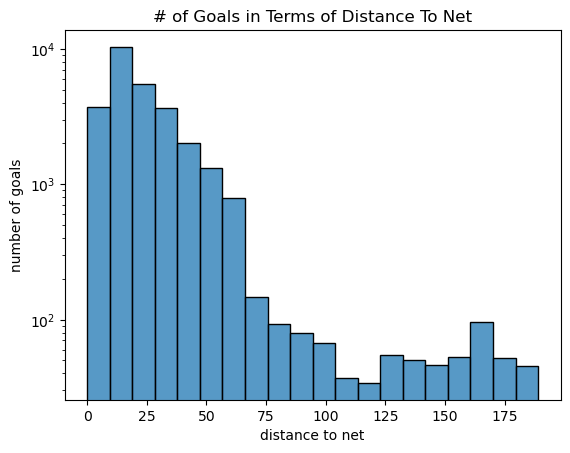

In [20]:
ax = sns.histplot(data = goals, x = 'distance_goal', bins = 20)
ax.set(title='# of Goals in Terms of Distance To Net',xlabel = 'distance to net', ylabel='number of goals')
plt.yscale('log')
plt.show()

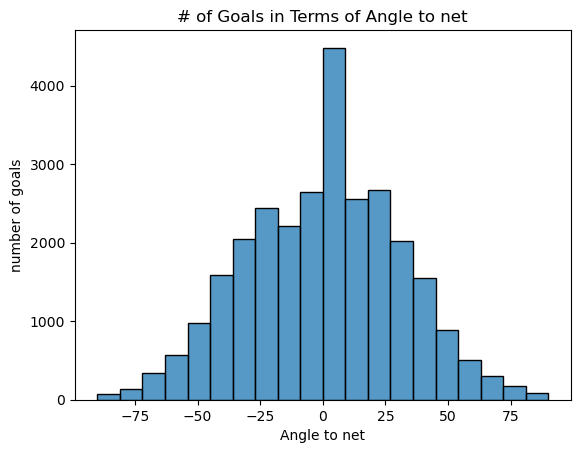

In [19]:
ax = sns.histplot(data = goals, x = 'angle_shot', bins = 20)
ax.set(title='# of Goals in Terms of Angle to net',xlabel = 'Angle to net', ylabel='number of goals')
plt.show()

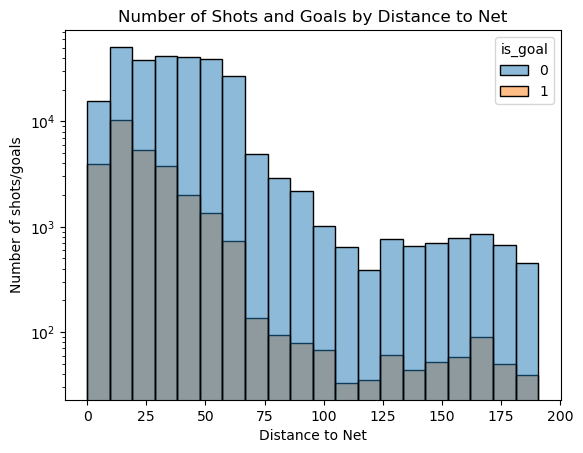

In [26]:
ax2 = sns.histplot(data = df, x = 'distance_goal', bins = 20, hue = 'is_goal')
ax2.set(title='Number of Shots and Goals by Distance to Net',xlabel = 'Distance to Net', ylabel='Number of shots/goals')
plt.yscale('log')
plt.show()

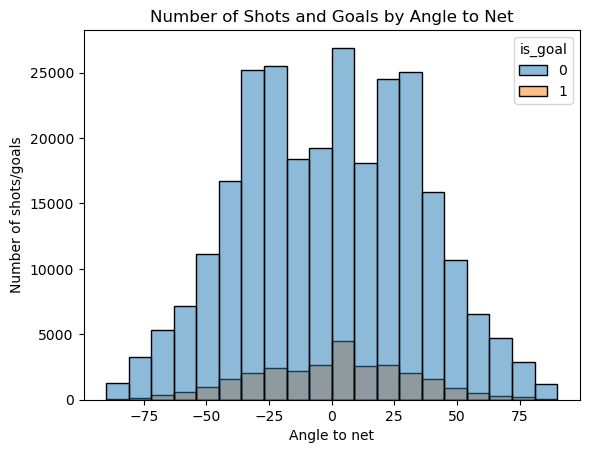

In [24]:
ax3 = sns.histplot(data = df, x = 'angle_shot', bins = 20, hue = 'is_goal')
ax3.set(title='Number of Shots and Goals by Angle to Net',xlabel = 'Angle to net', ylabel='Number of shots/goals')
#plt.yscale('log')
plt.show()

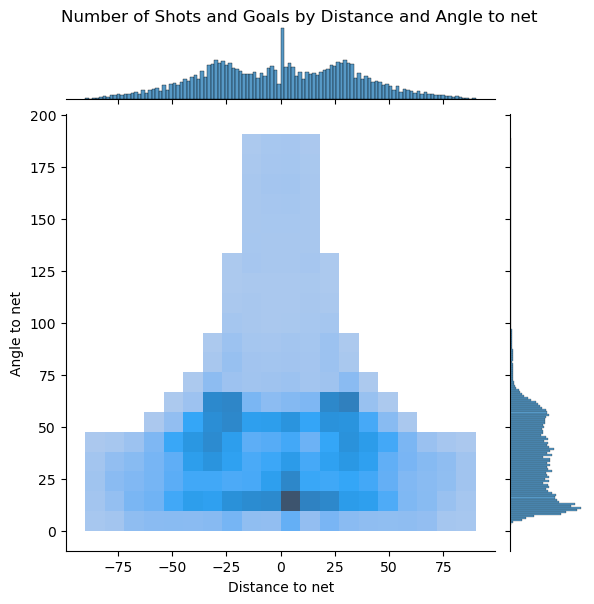

In [27]:
ax4 = sns.jointplot(data = df, x = 'angle_shot', y='distance_goal', kind = 'hist', bins = 20)
plt.suptitle('Number of Shots and Goals by Distance and Angle to net', y=1)
plt.xlabel('Distance to net')
plt.ylabel('Angle to net')
plt.show()

In [29]:
df_rates = df_eng.getProbabilities(20)

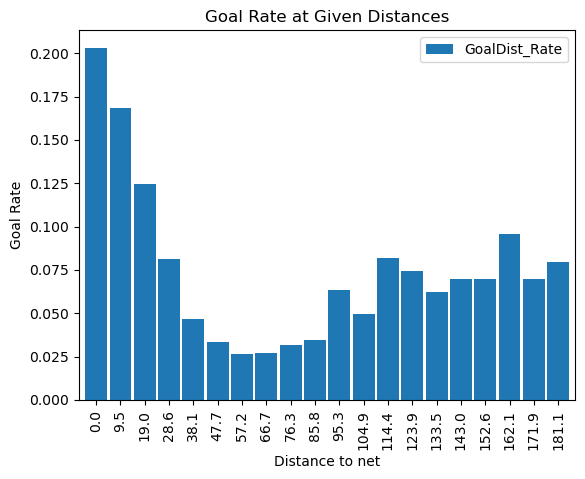

In [30]:
x1 = [0.0, 9.5, 19.0, 28.6, 38.1, 47.7, 57.2, 66.7, 76.3, 85.8, 95.3, 104.9, 114.4, 123.9, 133.5, 143.0, 152.6, 162.1, 171.9, 181.1]
df_rates['distance_point'] = x1
ax5 = df_rates.plot(x = 'distance_point', y = 'GoalDist_Rate', kind='bar', width=0.9)
ax5.set(title = 'Goal Rate at Given Distances', xlabel = 'Distance to net', ylabel= 'Goal Rate')
plt.show()

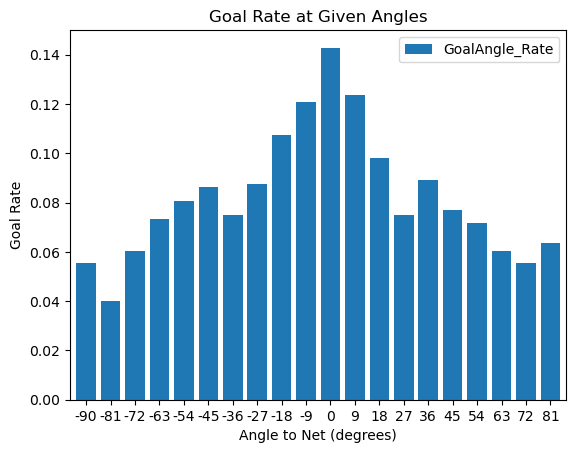

In [26]:
x2 = np.arange(-90, 90, 9)
df_rates['angle_point'] = x2
ax6 = df_rates.plot(x = 'angle_point', y = 'GoalAngle_Rate', kind='bar', width=0.8)
ax6.set(title = 'Goal Rate at Given Angles', xlabel = 'Angle to Net (degrees)', ylabel = 'Goal Rate')
ax6.set_xticklabels(x2, rotation=0)
plt.show()

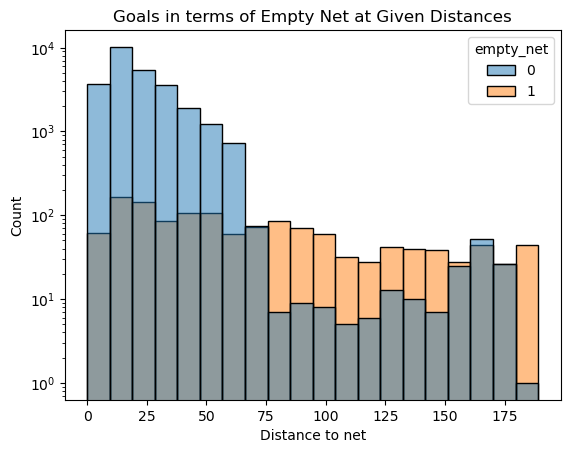

In [31]:
ax7 = sns.histplot(data = goals, x = 'distance_goal', hue = 'empty_net', bins = 20)
ax7.set(title = 'Goals in terms of Empty Net at Given Distances')
plt.xlabel('Distance to net')
plt.yscale('log')
plt.show()